This is the most time taking part. Advised to use 8 GPU cores as per the authors mentioned. I am not training the netwrok again, however finetuning is possible. Also In this notebook I am just writing the code to train the small er version of flickr face dataset, you can always download the 40GB JPGs to train from scratch. Here I am training the model with high qualtiy images from scratch for FLICKR FACE DATASET which is very similar for face dataset.

In [1]:
%tensorflow_version 1.x
!pip install opensimplex
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/stylegan2"

TensorFlow 1.x selected.
Mounted at /content/drive
/content/drive/My Drive/stylegan2


In [4]:
api_token = {"username":"samy280497","key":"f80239517ec84712358a021a2389ffc4"}
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json


import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d agrigorev/clothing-dataset-full
# https://www.kaggle.com/jangedoo/utkface-new

100% 6.49G/6.50G [02:29<00:00, 60.4MB/s]
100% 6.50G/6.50G [02:29<00:00, 46.8MB/s]


In [2]:
!ls

clothing-dataset-full.zip  images_original  stylegan2


In [ ]:
!unzip clothing-dataset-full.zip

In [5]:
!pwd

/content/drive/My Drive/stylegan2


In [9]:
!ls

clothing-dataset-full.zip  images.csv	    stylegan2
images_compressed	   images_original


In [3]:
%cd "/content/drive/My Drive/stylegan2/images_original"
#!/usr/bin/python
from PIL import Image
import os, sys

path = "/content/drive/My Drive/stylegan2/images_original/"
dirs = os.listdir(path)

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            im = im.convert('RGB')
            f, e = os.path.splitext(path+item)
            imResize = im.resize((1024,1024), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=94)

resize()

/content/drive/My Drive/stylegan2/images_original


In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
#2nd argument is where to put your tfrecords files
#3rd should point at your image dataset
!python dataset_tool.py create_from_images /content/drive/My\ Drive/stylegan2/stylegan2/datasets/images_original /content/drive/My\ Drive/stylegan2/images_original


/content/drive/My Drive/stylegan2/stylegan2
Loading images from "/content/drive/My Drive/stylegan2/images_original"
 33% 1910/5761 [09:58<19:56,  3.22it/s]

In [ ]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/datasets/images_original/"
!ls

In [7]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!python run_training.py --num-gpus=1 --data-dir=./datasets --config=config-b --dataset=images_original --mirror-augment=true --metrics=fid50k


/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00003-stylegan2-UTKFace-2gpu-config-f
dnnlib: Running training.training_loop.training_loop() on localhost...
Streaming data using training.dataset.TFRecordDataset...
tcmalloc: large alloc 4294967296 bytes == 0x7a4e000 @  0x7fb155747001 0x7fb1521ed4ff 0x7fb15223db08 0x7fb152241ac7 0x7fb1522e01a3 0x50a4a5 0x50cc96 0x507be4 0x508ec2 0x594a01 0x549e8f 0x5515c1 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x507be4 0x588e5c 0x59fd0e 0x50d256 0x5095c8 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x588e5c 0x59fd0e
tcmalloc: large alloc 4294967296 bytes == 0x7faf8baca000 @  0x7fb1557451e7 0x7fb1521ed41e 0x7fb15223dc2b 0x7fb15223e30f 0x7fb1522e00a3 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50cc96 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4
tcmalloc: large alloc 429

In [3]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/results"
!ls


/content/drive/My Drive/stylegan2/stylegan2/results
pretrained


In [17]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/results/00005-stylegan2-images_original-1gpu-config-f"
!ls


/content/drive/My Drive/stylegan2/stylegan2/results/00005-stylegan2-UTKFace-1gpu-config-f
fakes010000.jpg  log.txt		      reals.jpg  submit_config.pkl
fakes_init.jpg	 network-snapshot-010000.pkl  run.txt	 submit_config.txt


In [18]:
%cd "/content/drive/My Drive/stylegan2/stylegan2"
!python run_metrics.py --data-dir=./datasets --network=./results/00005-stylegan2-images_original-1gpu-config-b/network-snapshot-010000.pkl --metrics=fid50k,ppl_wend --dataset=UTKFace --mirror-augment=true

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00006-run-metrics
dnnlib: Running run_metrics.run() on localhost...
Evaluating metrics "fid50k,ppl_wend" for "./results/00005-stylegan2-UTKFace-1gpu-config-f/network-snapshot-010000.pkl"...
Traceback (most recent call last):
  File "run_metrics.py", line 84, in <module>
    main()
  File "run_metrics.py", line 79, in main
    dnnlib.submit_run(sc, 'run_metrics.run', **kwargs)
  File "/content/drive/My Drive/stylegan2/stylegan2/dnnlib/submission/submit.py", line 343, in submit_run
    return farm.submit(submit_config, host_run_dir)
  File "/content/drive/My Drive/stylegan2/stylegan2/dnnlib/submission/internal/local.py", line 22, in submit
    return run_wrapper(submit_config)
  File "/content/drive/My Drive/stylegan2/stylegan2/dnnlib/submission/submit.py", line 280, in run_wrapper
    run_func_obj(**submit_config.run_func_kwargs)
  File "/content/drive/My Drive/stylegan2/stylegan2/run_metrics.py", line 27, in ru

In [13]:
%cd "/content/drive/My Drive/stylegan2/stylegan2/"
!pip install opensimplex
!python run_generator.py generate-images --network=./results/00005-stylegan2-UTKFace-1gpu-config-f/network-snapshot-010000.pkl --seeds=6600-6635 --truncation-psi=0.5

/content/drive/My Drive/stylegan2/stylegan2
Local submit - run_dir: results/00004-generate-images
dnnlib: Running run_generator.generate_images() on localhost...
Loading networks from "./results/00002-stylegan2-UTKFace-1gpu-config-f/network-snapshot-010000.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
Generating image for seed 6600 (1/36) ...
Generating image for seed 6601 (2/36) ...
Generating image for seed 6602 (3/36) ...
Generating image for seed 6603 (4/36) ...
Generating image for seed 6604 (5/36) ...
Generating image for seed 6605 (6/36) ...
Generating image for seed 6606 (7/36) ...
Generating image for seed 6607 (8/36) ...
Generating image for seed 6608 (9/36) ...
Generating image for seed 6609 (10/36) ...
Generating image for seed 6610 (11/36) ...
Generating image for seed 6611 (12/36) ...
Generating image for seed 6612 (13/36) ...
Generating image for 

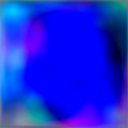

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6600.png


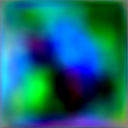

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6601.png


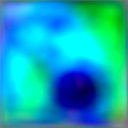

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6602.png


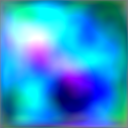

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6603.png


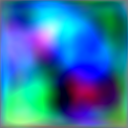

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6604.png


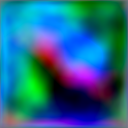

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6605.png


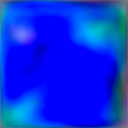

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6606.png


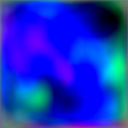

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6607.png


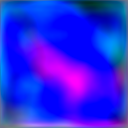

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6608.png


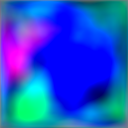

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6609.png


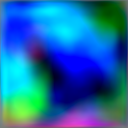

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6610.png


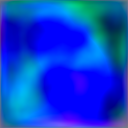

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6611.png


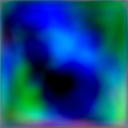

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6612.png


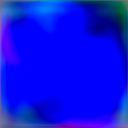

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6613.png


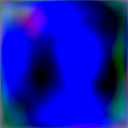

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6614.png


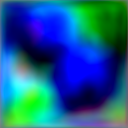

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6615.png


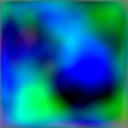

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6616.png


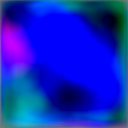

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6617.png


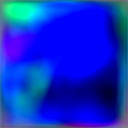

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6618.png


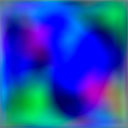

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6619.png


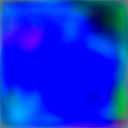

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6620.png


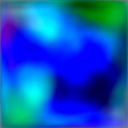

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6621.png


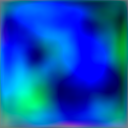

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6622.png


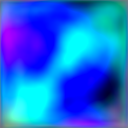

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6623.png


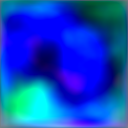

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6624.png


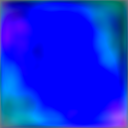

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6625.png


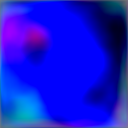

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6626.png


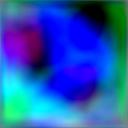

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6627.png


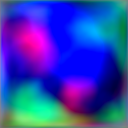

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6628.png


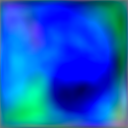

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6629.png


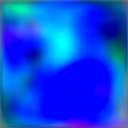

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6630.png


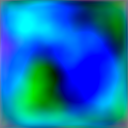

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6631.png


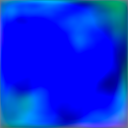

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6632.png


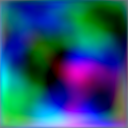

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6633.png


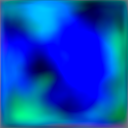

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6634.png


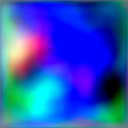

/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/seed6635.png


In [14]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/drive/My Drive/stylegan2/stylegan2/results/00004-generate-images/*.png'): 
    display(Image(filename=imageName))
    print(imageName)